# Polynomial regression

## Author: Sinclair Tsana

Polynomial regression, like linear regression, uses the relationship between the variables x and y 

to find the best way to draw a line through the data points.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylatex

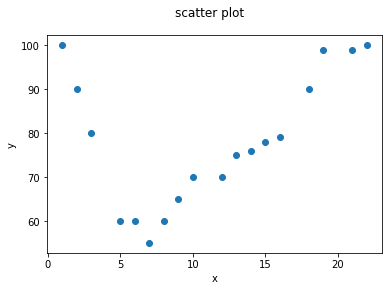

In [6]:
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.suptitle("scatter plot")
plt.show()

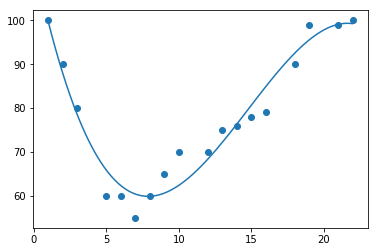

In [11]:
model = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(1, 22, 100)           # we start at position 1, and end at position 22
plt.scatter(x, y)
plt.plot(myline, model(myline))
plt.show()

# The R-squared

Sklearn module will computed the R-squared value for you.

In [12]:
from sklearn.metrics import r2_score

In [13]:
model = np.poly1d(np.polyfit(x, y, 3))
print(r2_score(y, model(x)))

0.9432150416451027


The result is : 0.94, meaning that the is a very good relationship between our two variables.

> Exemple: We want to predict the y value for x = 14

In [17]:
print("The predicted value for x = 14 is :",model(14))

The predicted value for x = 14 is : 76.32434409465553


# Multiple regression

Multiple regression is like linear regression, but with more than one independent value,

meaning that we try to predict a value based on two or more variables.

The pandas module will help us to read csv files.

In [18]:
import pandas as pd

In [28]:
# Importing data
data = pd.read_csv("cars.csv")
data[:10+1]

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


We make a list of the independent values and call this variable x.

Put the dependent values in a variable called y.

In [35]:
X = data[['Weight', 'Volume']] # Dependent variables
y = data['CO2']                # Independent variable

In [31]:
from sklearn import linear_model

From the sklearn module we will use the LinearRegression() method to create a linear regression object.

This object has a method called fit() that takes the independent and dependent values as parameters 
and fills the regression object with data that describes the relationship:

In [36]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
#predict the CO2 emission of a car where the weight is 2300g, and the volume is 1300ccm:
predictedCO2 = regr.predict([[2300, 1300]])
predictedCO2

array([107.2087328])

In [53]:
print("We have predicted that a car with 1.3 liter engine, and a weight of 2.3 kg, will release approximately ", predictedCO2, "g of CO2 every kilometers")

We have predicted that a car with 1.3 liter engine, and a weight of 2.3 kg, will release approximately  [107.2087328]  g of CO2 every kilometers


## Coefficients

In [59]:
print("Weight :",regr.coef_[0], "\nVolume :", regr.coef_[1])

Weight : 0.007550947270300689 
Volume : 0.007805257527747124


If the weight increases by 1g, the CO2 emission increases by 0.00755095g.

If the engine size (Volume) increases by 1 cm, the CO2 emission increases by 0.00780526 g.

> Exemple:

In [61]:
predictedCO2 = regr.predict([[3300, 1300]])
predictedCO2

array([114.75968007])

# Scale

When your data has different values, and even different measurement units, it can be difficult to compare them. 

What is kilograms compared to meters? Or altitude compared to time?

We use scaling to solve this kine of problem.

We can scale data into new values that are easier to compare.

The are differents methods for scalling data.

## 1st Method : Standardization

These method uses this formula:

z = (x - u) / s

Where z is the new value, x is the original value, u is the mean and s is the standard deviation

the Python sklearn module has a method called StandardScaler() 

which returns a Scaler object with methods for transforming data sets.

> Exemple: Scale all values in the Weight and Volume

In [62]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

df = pd.read_csv("cars.csv")

X = df[['Weight', 'Volume']]

scaledX = scale.fit_transform(X)

print(scaledX)

[[-2.10389253 -1.59336644]
 [-0.55407235 -1.07190106]
 [-1.52166278 -1.59336644]
 [-1.78973979 -1.85409913]
 [-0.63784641 -0.28970299]
 [-1.52166278 -1.59336644]
 [-0.76769621 -0.55043568]
 [ 0.3046118  -0.28970299]
 [-0.7551301  -0.28970299]
 [-0.59595938 -0.0289703 ]
 [-1.30803892 -1.33263375]
 [-1.26615189 -0.81116837]
 [-0.7551301  -1.59336644]
 [-0.16871166 -0.0289703 ]
 [ 0.14125238 -0.0289703 ]
 [ 0.15800719 -0.0289703 ]
 [ 0.3046118  -0.0289703 ]
 [-0.05142797  1.53542584]
 [-0.72580918 -0.0289703 ]
 [ 0.14962979  1.01396046]
 [ 1.2219378  -0.0289703 ]
 [ 0.5685001   1.01396046]
 [ 0.3046118   1.27469315]
 [ 0.51404696 -0.0289703 ]
 [ 0.51404696  1.01396046]
 [ 0.72348212 -0.28970299]
 [ 0.8281997   1.01396046]
 [ 1.81254495  1.01396046]
 [ 0.96642691 -0.0289703 ]
 [ 1.72877089  1.01396046]
 [ 1.30990057  1.27469315]
 [ 1.90050772  1.01396046]
 [-0.23991961 -0.0289703 ]
 [ 0.40932938 -0.0289703 ]
 [ 0.47215993 -0.0289703 ]
 [ 0.4302729   2.31762392]]


C:\Users\ASUS PC\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ASUS PC\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [63]:
regr = linear_model.LinearRegression()
regr.fit(scaledX, y)

scaled = scale.transform([[2300, 1.3]])

predictedCO2 = regr.predict([scaled[0]])
print(predictedCO2)

[97.07204485]
